In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
sns.set_theme()

In [4]:
import os
import json

In [6]:
results_root = '/home/kwatchar3/bss_spatial_eval/results/bothdelay'

ddfs = os.listdir(results_root)
print(ddfs)


dfs = []

for d in ddfs:
    if 'results-ok.csv' in os.listdir(os.path.join(results_root, d)):
        df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    else:
        continue
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
    print(args.get('estim_filter_kwargs'))
    if args['estim_filter_kwargs']:
        df['rdelay'] = args['estim_filter_kwargs']['rdelay'] + 1
    else:
        df['rdelay'] = 1
    dfs.append(df)

df = pd.concat(dfs)
# df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 

# df = df[df['cutoff'] <= 4000]

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

['20221130192555', '20221130192532', '20221130192618', '20221130192821', '20221130192847', '20221130192444', '20221130192730', '20221130192706', '20221130192641', '20221130192509', '20221130192755']
{'ldelay': 0, 'rdelay': 4, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 2, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 8, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 256, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 512, 'ftype': 'delay'}
None
{'ldelay': 0, 'rdelay': 64, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 32, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 16, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 1, 'ftype': 'delay'}
{'ldelay': 0, 'rdelay': 128, 'ftype': 'delay'}


In [7]:
df

,Unnamed: 0,spr/num,sfr/num,cost,true_angle,est_angle,est_deviation,file,rdelay
0,0,8.176401,201.020727,5.754450e-19,0.0,-45.0,-45.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,5
1,1,11.666607,199.585444,8.006624e-19,0.0,-30.0,-30.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,5
2,2,17.668014,199.425110,8.305573e-19,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,5
3,3,309.119297,309.119297,0.000000e+00,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,5
4,4,17.666845,201.708736,4.906522e-19,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fcj...,5
...,...,...,...,...,...,...,...,...,...
443,443,17.671348,225.172809,2.515410e-21,0.0,-15.0,-15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,129
444,444,310.270147,310.270147,0.000000e+00,0.0,0.0,0.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,129
445,445,17.663515,239.124991,1.008879e-22,0.0,15.0,15.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,129
446,446,11.657688,234.908610,2.659126e-22,0.0,30.0,30.0,/home/kwatchar3/data/timit/timit/train/dr1/fkf...,129


In [8]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(df.rdelay.min(), df.rdelay.max()), cmap=palette), 
        ax=ax, label='Delay taps', 
        pad=0.01, aspect=30, 
        ticks=[1, 8, 64, 256, 512],
        format=lambda v, t: f"{v}"
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

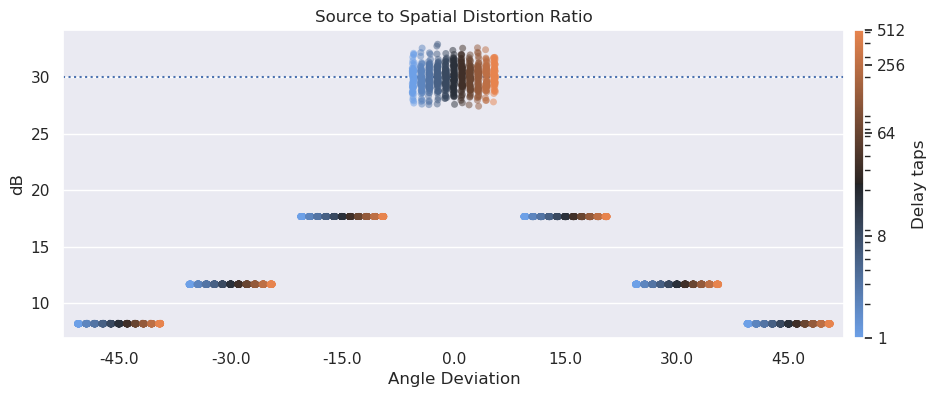

In [9]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(12, 4))
 
line = 30 #np.percentile(df['spr/numx'].values, 0.99)
    
df['spr/numx'] = df['spr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)
    
ax = sns.stripplot(df,  y='spr/numx', x='est_deviation', hue='rdelay', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm(df.rdelay.min(), df.rdelay.max()))
ax.set(ylabel='dB', title='Source to Spatial Distortion Ratio', xlabel='Angle Deviation')

set_axes(fig, ax, line)
plt.show()

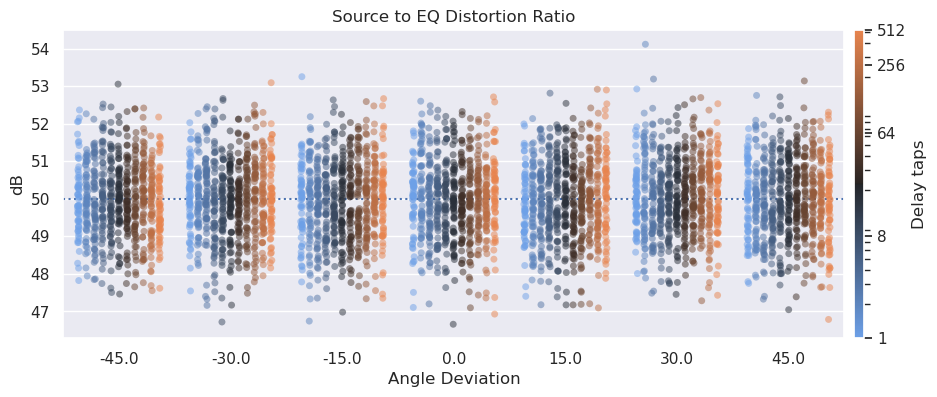

In [10]:
# ax = sns.scatterplot(df[~(df['filt'].str.contains('no'))], x='est_deviation_j', y='sfr/num', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))

line = 50

df['sfr/numx'] = df['sfr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

ax = sns.stripplot(df,  y='sfr/numx', x='est_deviation', hue='rdelay', palette=palette, ax=ax, alpha=0.5, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='dB', title='Source to EQ Distortion Ratio', xlabel='Angle Deviation')
set_axes(fig, ax, line)
plt.show()

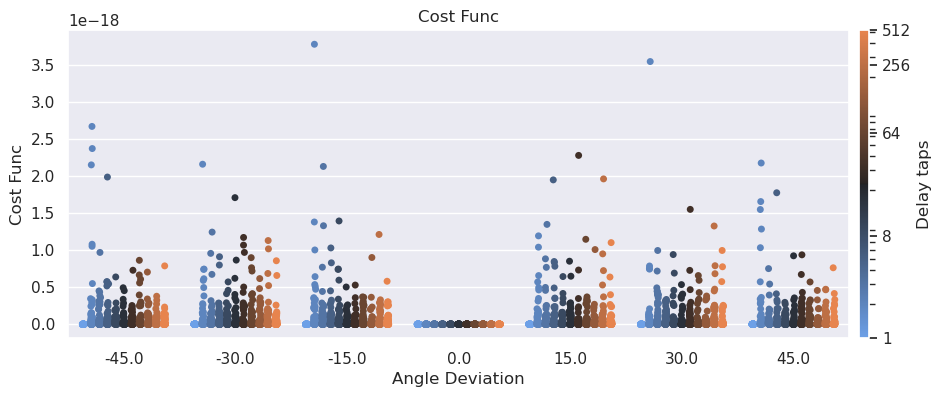

In [11]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='rdelay', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
set_axes(fig, ax, line=False)
plt.show()